In [1]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import surface_amplitudes as sf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Load data

In [2]:
from modules.globals import folder_names

smooth_surfaces= {}
choose_folder = 11
folder = folder_names[choose_folder-1]
files = glob.glob(os.path.join(folder, "surface_smooth_*"))
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[-1]
    volume, surface = read_and_write.read_surface_data(folder, file_name)
    smooth_surfaces[smearing_level] = surface


In [3]:
smooth_surfaces = dict(sorted(smooth_surfaces.items(), key=lambda item: int(item[0])))

In [4]:
utility.display_markdown_title(folder)

# $\text{SU}(4)$, $V$ = ['44', '44', '64', '6'], $\beta=$ 10.85, twist coeff $=$ 1

Smearing Level: 5
Smearing Level: 10
Smearing Level: 20
Smearing Level: 30
Smearing Level: 40
Smearing Level: 50


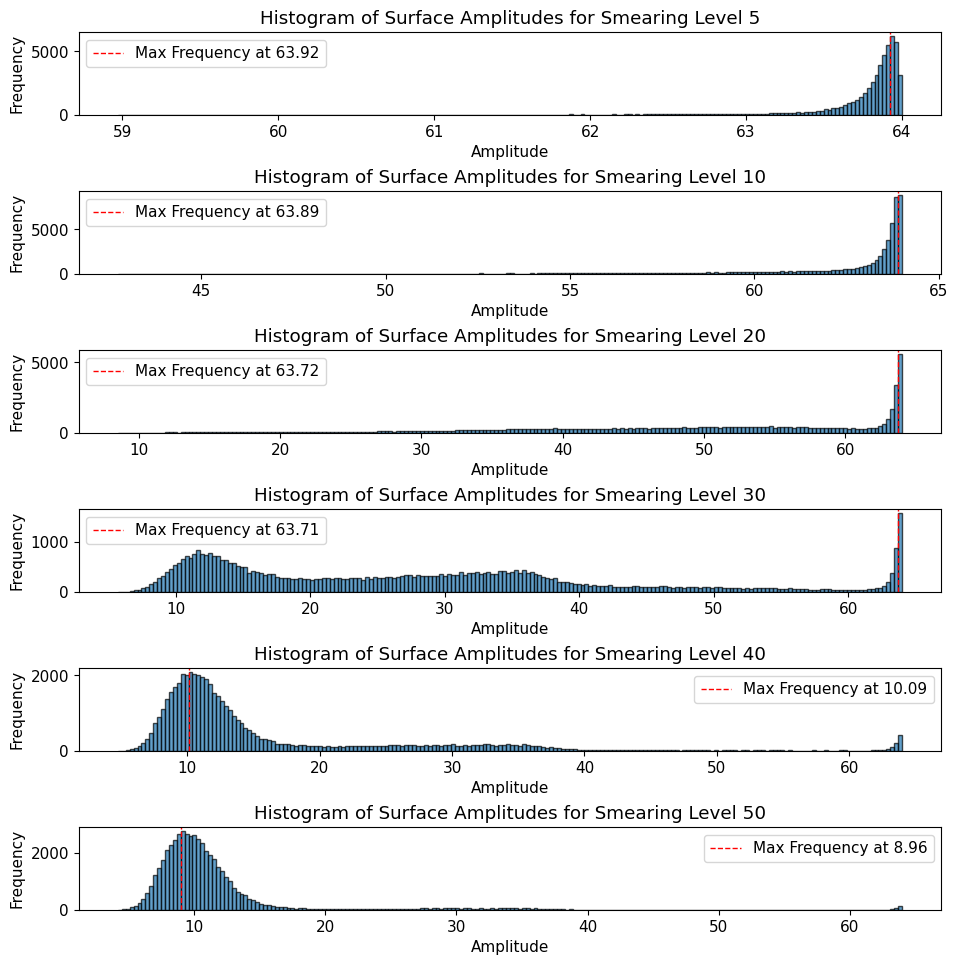

{'5': (63.804632933266625, 58.9724, 63.999700000000004), '10': (62.838599789485, 42.74555, 63.9997), '20': (50.57788185343056, 8.523900000000001, 63.998799999999996), '30': (28.020172625317525, 5.69459, 63.99820000000001), '40': (15.58633947269628, 4.75522, 63.9928), '50': (11.15011424433698, 4.1777000000000015, 63.994099999999996)}


In [5]:
indices = sf.surface_amplitudes(smooth_surfaces=smooth_surfaces, return_threshold=40,thermalization=10)

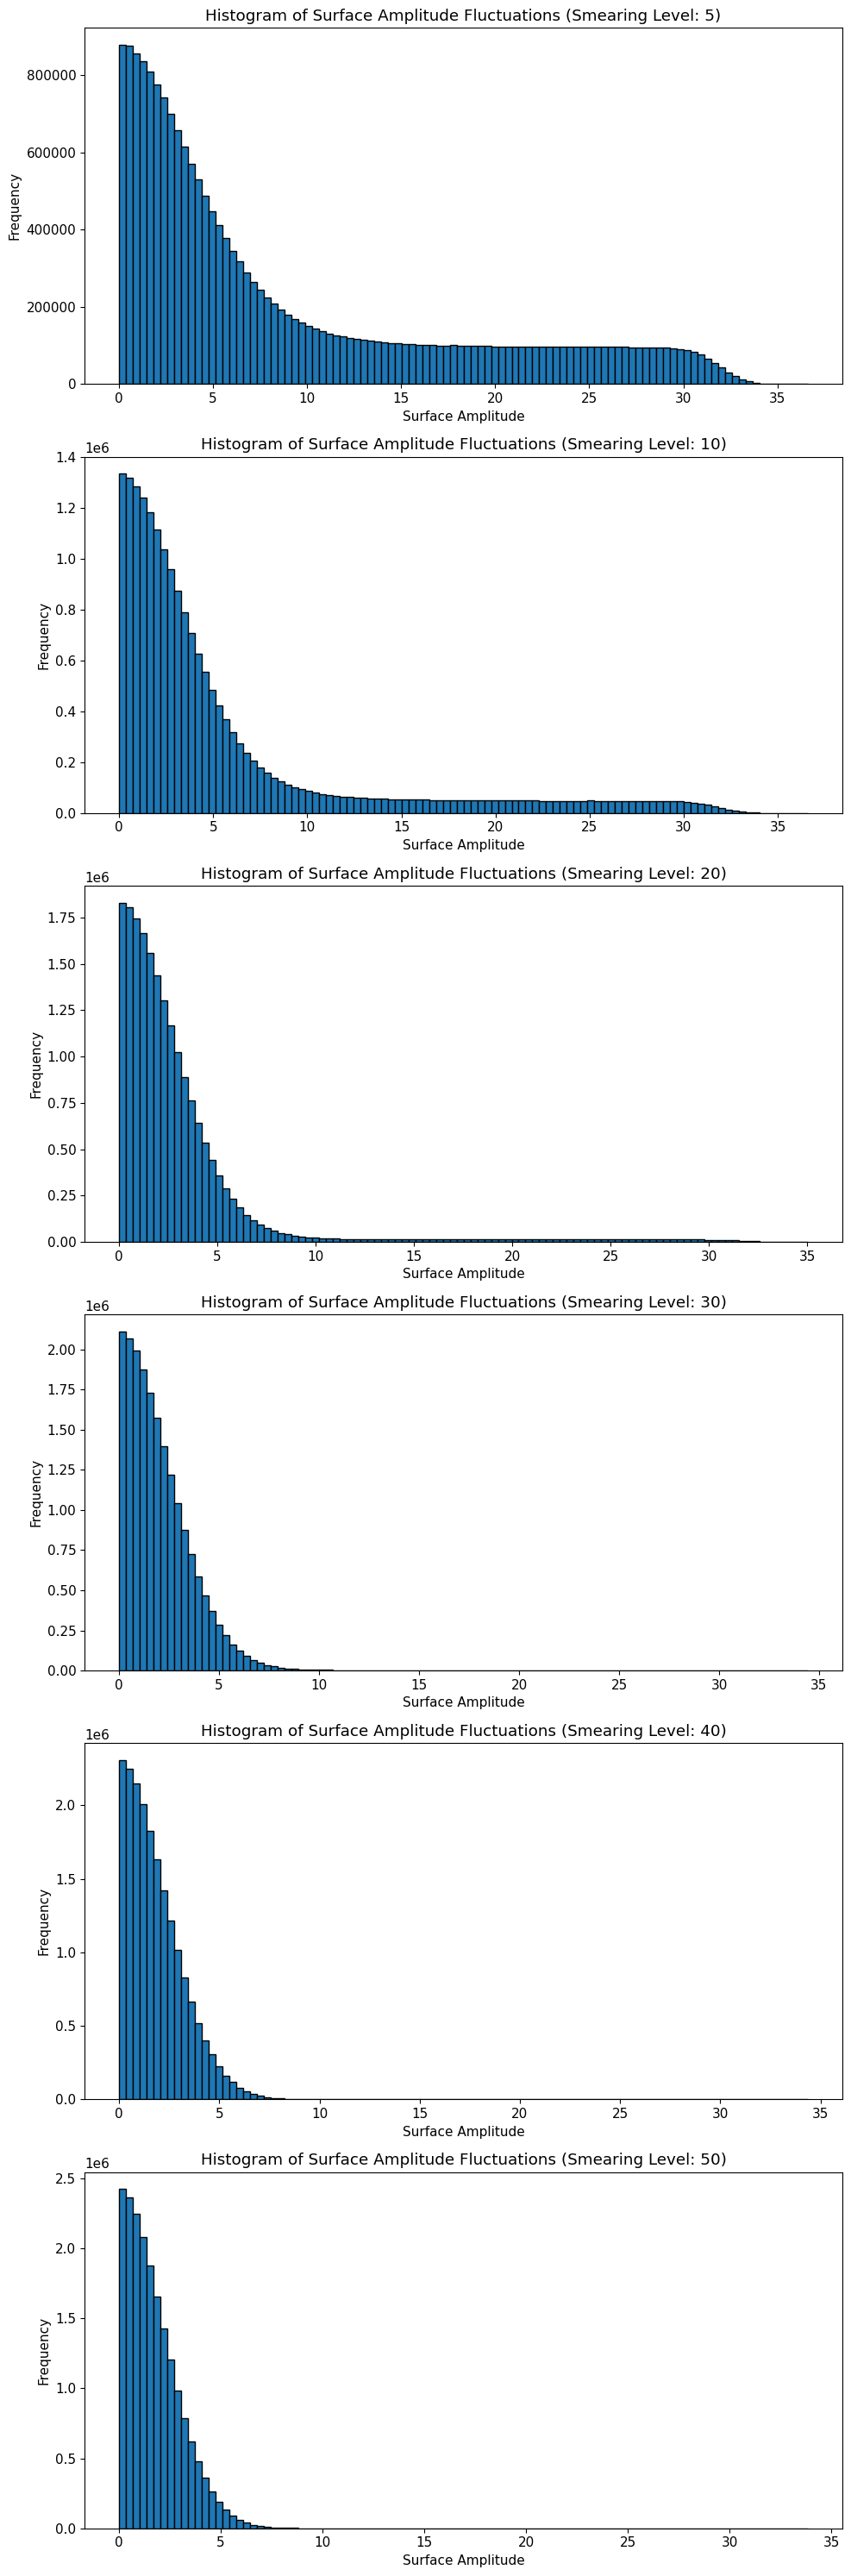

In [35]:
# Create a dictionary to store fluctuations for each smearing level
fluctuations_dict = {}
thermalization = 1000

for smearing_level, surface_data in smooth_surfaces.items():
    post_thermalization_data = surface_data[thermalization:thermalization+10000]
    mean_z_values = np.mean(post_thermalization_data[:, :, 2], axis=1)
    fluctuations = post_thermalization_data[:, :, 2] - mean_z_values[:, np.newaxis]
    fluctuations_dict[smearing_level] = fluctuations.flatten()
    
# Plotting all histograms in subplots
num_plots = len(fluctuations_dict)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

for ax, (smearing_level, fluctuations) in zip(axes, fluctuations_dict.items()):
    ax.hist(fluctuations,edgecolor='black', bins=100)
    ax.set_xlabel('Surface Amplitude')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of Surface Amplitude Fluctuations (Smearing Level: {smearing_level})')

plt.tight_layout()
plt.show()
